#### <p style="text-align:right;">Jorge Castro DAPT BER</p>

<div class="alert alert-block alert-info">



# Lab (Customer Analysis Round 5 & 6)



Jump to:
* [Customer Analysis Round 5](#Customer-Analysis-Round-5)
    * [Dealing with the data](#Dealing-with-the-data)
    * [Processing Data (Further processing)](#Processing-Data-(Further-processing))
    * [X-y split](#X-y-split)
    * [Normalize (numerical)](#Normalize-(numerical))            
    
    
* [Customer Analysis Round 6](#Customer-Analysis-Round-6)
    * [Processing Data](#Processing-Data)    
        * [One Hot/Label Encoding (categorical)](#One-Hot/Label-Encoding-(categorical))
        * [Concat DataFrames](#Concat-DataFrames)
    * [Linear Regression](#Linear-Regression)
        * [Train-test split](#Train-test-split)
        * [Apply linear regression](#Apply-linear-regression)
    * [Model Validation](#Model-Validation)
        * [Description : R2 / MSE / RMSE / MAE](#Description-:-R2-/-MSE-/-RMSE-/-MAE)              

    
* [Customer Analysis Round 7](#Customer-Analysis-Round-7)
    * [Description:](#Description:)
        * [Try to improve the linear regression model](#Try-to-improve-the-linear-regression-model) 



[<a href="#Jorge-Castro-DAPT-BER">Back to Top</a>]

</div>


In [80]:
# Hyperlink Same notebook

import pyperclip as pc
link_title = input('Enter hyperlink title:')
dashed_title = link_title.replace(" ", "-")
link = ('[{}](#{})'.format(link_title, dashed_title))
pc.copy(link)

Enter hyperlink title:Try to improve the linear regression model


In [53]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import sweetviz as sv
%matplotlib inline
import math

# Customer Analysis Round 5
##### Dealing with the data
[<a href="#Jorge-Castro-DAPT-BER">Back to Top</a>]

In [54]:
    # Reading csv file
df = pd.read_csv('marketing_customer_analysis.csv')
    
    # Lower caseing headers
df.columns = df.columns.str.lower()
    
    # Replacing spaces by underscores
df.columns = df.columns.str.replace(' ', '_')
    
    # Dropping the column 'unnamed:_0' as it is a duplicate from the index
df = df.drop('unnamed:_0', 1)
    
    # Dealing with null values:
nulls_df = pd.DataFrame(round(df.isna().sum()/len(df)*100,2))
nulls_df = nulls_df.reset_index()
nulls_df.columns = ['header_name', '%_nulls']
columns_drop = nulls_df[nulls_df['%_nulls'] > 50 ]['header_name']
df1 = df.drop(columns_drop, axis = 1)
df1.reset_index()
df2 = df1.dropna(how='any')
df2['effective_to_date_2']=pd.to_datetime(df.effective_to_date)
df3 = df2.drop('effective_to_date', axis=1)
    
    # we extract the the month as another series:
df3['month'] = pd.DatetimeIndex(df3['effective_to_date_2']).month

In [55]:
df3.head()

,customer,state,customer_lifetime_value,response,coverage,education,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,effective_to_date_2,month
0,DK49336,Arizona,4809.216960,No,Basic,College,Employed,M,48029,Suburban,Married,61,7.0,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,2011-02-18,2
1,KX64629,California,2228.525238,No,Basic,College,Unemployed,F,0,Suburban,Single,64,3.0,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,2011-01-18,1
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,Employed,M,22139,Suburban,Single,100,34.0,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,2011-02-10,2
3,XL78013,Oregon,22332.439460,Yes,Extended,College,Employed,M,49078,Suburban,Single,97,10.0,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,2011-01-11,1
6,IW72280,California,5035.035257,No,Basic,Doctor,Employed,F,37405,Urban,Married,63,8.0,99,3.0,4,Corporate Auto,Corporate L2,Offer2,Branch,287.556107,Four-Door Car,Medsize,2011-02-14,2


##### Processing Data (Further processing)
##### X-y split
[<a href="#Jorge-Castro-DAPT-BER">Back to Top</a>]

In [56]:
# Spliting numerical data and categorical data

x_num = df3.select_dtypes(include = np.number)
x_cat = df3.select_dtypes(include = np.object)
y_num = df3.select_dtypes(include = np.number)

In [57]:
x_num.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,month
0,4809.216960,48029,61,7.0,52,0.0,9,292.800000,2
1,2228.525238,0,64,3.0,26,0.0,1,744.924331,1
2,14947.917300,22139,100,34.0,31,0.0,2,480.000000,2
3,22332.439460,49078,97,10.0,3,0.0,2,484.013411,1
6,5035.035257,37405,63,8.0,99,3.0,4,287.556107,2


##### Normalize (numerical)
[<a href="#Jorge-Castro-DAPT-BER">Back to Top</a>]

In [58]:
# Normalizing data (transforming values to a range between 0 and 1)

from sklearn.preprocessing import Normalizer


In [59]:
transformer = Normalizer().fit(x_num)
x_normalized = transformer.transform(x_num)
print(x_normalized.shape)

(9134, 9)


<function matplotlib.pyplot.show(close=None, block=None)>

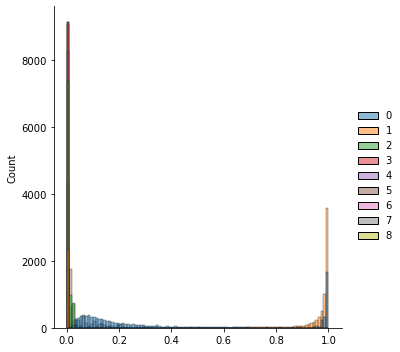

In [60]:
sb.displot(x_normalized,bins = 100)
plt.show

# Customer Analysis Round 6
### Processing Data
##### One Hot/Label Encoding (categorical)

[<a href="#Jorge-Castro-DAPT-BER">Back to Top</a>]

In [61]:
x_cat.head()

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,DK49336,Arizona,No,Basic,College,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize
1,KX64629,California,No,Basic,College,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize
2,LZ68649,Washington,No,Basic,Bachelor,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize
3,XL78013,Oregon,Yes,Extended,College,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize
6,IW72280,California,No,Basic,Doctor,Employed,F,Urban,Married,Corporate Auto,Corporate L2,Offer2,Branch,Four-Door Car,Medsize


In [62]:
# Here we apply OneHotEncoder to translate categorical values into numbers

import sklearn
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder().fit(x_cat)
encoded = encoder.transform(x_cat).toarray()

In [63]:
encoder.categories_

[array(['AA10041', 'AA11235', 'AA16582', ..., 'ZZ89380', 'ZZ91716',
        'ZZ97035'], dtype=object),
 array(['Arizona', 'California', 'Nevada', 'Oregon', 'Washington'],
       dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['Basic', 'Extended', 'Premium'], dtype=object),
 array(['Bachelor', 'College', 'Doctor', 'High School or Below', 'Master'],
       dtype=object),
 array(['Disabled', 'Employed', 'Medical Leave', 'Retired', 'Unemployed'],
       dtype=object),
 array(['F', 'M'], dtype=object),
 array(['Rural', 'Suburban', 'Urban'], dtype=object),
 array(['Divorced', 'Married', 'Single'], dtype=object),
 array(['Corporate Auto', 'Personal Auto', 'Special Auto'], dtype=object),
 array(['Corporate L1', 'Corporate L2', 'Corporate L3', 'Personal L1',
        'Personal L2', 'Personal L3', 'Special L1', 'Special L2',
        'Special L3'], dtype=object),
 array(['Offer1', 'Offer2', 'Offer3', 'Offer4'], dtype=object),
 array(['Agent', 'Branch', 'Call Center', 'Web'], dtype=obje

##### Concat DataFrames
[<a href="#Jorge-Castro-DAPT-BER">Back to Top</a>]

In [64]:
x = np.concatenate((x_normalized, encoded), axis = 1)

In [65]:
x

array([[0.09963132, 0.99500452, 0.00126372, ..., 0.        , 1.        ,
        0.        ],
       [0.94800653, 0.        , 0.02722537, ..., 0.        , 1.        ,
        0.        ],
       [0.55948303, 0.82863682, 0.00374288, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.08569715, 0.99631011, 0.00105911, ..., 0.        , 1.        ,
        0.        ],
       [0.51433231, 0.85753967, 0.00432677, ..., 0.        , 1.        ,
        0.        ],
       [0.18332425, 0.98300384, 0.00241942, ..., 0.        , 1.        ,
        0.        ]])

### Linear Regression
##### Train-test split
[<a href="#Jorge-Castro-DAPT-BER">Back to Top</a>]

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
y = y_num

In [68]:
x_train,x_test, y_train, y_test = train_test_split(x,y, test_size= 0.40, random_state=100)

In [69]:
x_train.shape

(5480, 9200)

##### Apply linear regression
[<a href="#Jorge-Castro-DAPT-BER">Back to Top</a>]

In [70]:
lm = linear_model.LinearRegression()
model = lm.fit(x_train, y_train)
predictions = lm.predict(x_test)
r2_score(y_test, predictions)

0.3580461959388517

### Model Validation
##### Description : R2 / MSE / RMSE / MAE
[<a href="#Jorge-Castro-DAPT-BER">Back to Top</a>]

In [71]:
mse = mean_squared_error(y_test, predictions)
print(mse)

26853253.68175693


In [72]:
rmse = math.sqrt(mse)
print(rmse)

5182.012512697835


In [73]:
r2 = r2_score(y_test, predictions)
r2

0.3580461959388517

In [74]:
n = len(x_test) 
p = x_test.shape[1]

In [75]:
adj_r2 = 1-((1-r2)*(n-1)/(n-p-1))
adj_r2

1.4227613568118578

# Customer Analysis Round 7
## Description:
##### Try to improve the linear regression model.
[<a href="#Jorge-Castro-DAPT-BER">Back to Top</a>]

In [81]:
lm = linear_model.LinearRegression()
model = lm.fit(x_train, y_train)
predictions = lm.predict(x_test)
r2_score(y_test, predictions)

0.3580461959388517

[<a href="#Jorge-Castro-DAPT-BER">Back to Top</a>]